# How to Align Images #

## Objectives ##

* align images using wcs
* write out aligned images

## If you don't have WCS header information ##

* use astronometry.net to solve the WCS for each image
* you can install the software locally, or upload your images to nova.astronometry.net

## References ##

Borrowing heavily from https://reproject.readthedocs.io/en/stable/

## Import modules ##

In [2]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import glob

# import scoreatpercentile to figure out colorscale for images
from scipy.stats import scoreatpercentile
# an astropy module to reproject images
from reproject import reproject_interp

import matplotlib.pyplot as plt
%matplotlib inline

## Sample Images ##
I will be using three images of the ring nebula taken in B, Halpha, and [OIII] filters.  These were taken with our 8" telescope and SBIG STL-11000M CCD.  I uploaded the images to astronometry.net and then downloaded the 'new-image.fits' with the WCS information included in the header.

The images are located in the subdirectory images/ which I define below.

In [4]:
imagepath = 'images/'
filenames = glob.glob(imagepath+'ring*.fits')
for f in filenames:
    print f

images/ring-b-01-wcs.fits
images/ring-ha-01-wcs.fits
images/ring-oiii-01-wcs.fits


We can read in the images:

In [11]:
hdu_b = fits.open(filenames[0])[0]
hdu_ha = fits.open(filenames[1])[0]
hdu_o3 = fits.open(filenames[2])[0] 

We can display the images

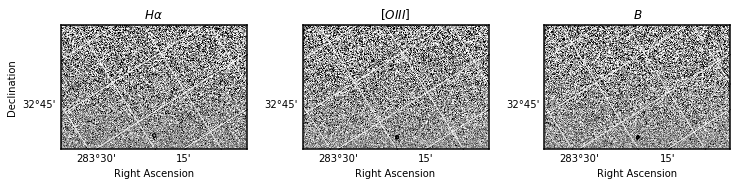

In [38]:
plt.figure(figsize=(12,15))
plt.subplots_adjust(wspace=.3)
ax1 = plt.subplot(1,3,1,projection = WCS(hdu_ha.header))
ax1.imshow(hdu_ha.data,origin='lower',vmin=scoreatpercentile(hdu_ha.data,2.5),vmax=scoreatpercentile(hdu_ha.data,97),cmap='Greys')
ax1.coords.grid(color='white')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
plt.title(r'$H\alpha$')

# [OIII] image
ax2 = plt.subplot(1,3,2,projection = WCS(hdu_ha.header))
ax2.imshow(hdu_o3.data,origin='lower',vmin=scoreatpercentile(hdu_o3.data,2.5),vmax=scoreatpercentile(hdu_o3.data,97),cmap='Greys')
ax2.coords.grid(color='white')
ax2.coords['ra'].set_axislabel('Right Ascension')
plt.title(r'$[OIII]$')

# B-band image
ax3 = plt.subplot(1,3,3,projection = WCS(hdu_ha.header))
ax3.imshow(hdu_o3.data,origin='lower',vmin=scoreatpercentile(hdu_o3.data,2.5),vmax=scoreatpercentile(hdu_o3.data,97),cmap='Greys')
ax3.coords.grid(color='white')
ax3.coords['ra'].set_axislabel('Right Ascension')
plt.title(r'$B$')

## Reproject Images ##

I am going to reproject the [OIII] and B-band images onto the $H\alpha$ image.

In [41]:
o3new, o3footprint = reproject_interp(hdu_o3, hdu_ha.header)


In [ ]:
bnew, bfootprint = reproject_interp(hdu_b, hdu_ha.header)

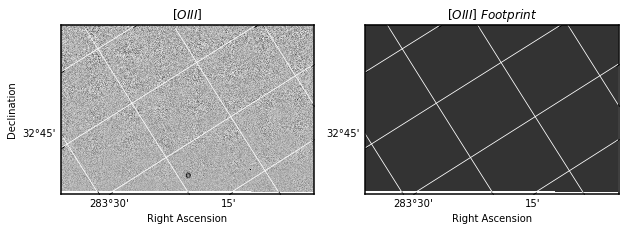

In [46]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1,projection = WCS(hdu_ha.header))
ax1.imshow(o3new,origin='lower',vmin=scoreatpercentile(o3new.data,2.5),vmax=scoreatpercentile(o3new.data,97),cmap='Greys')
ax1.coords.grid(color='white')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
plt.title(r'$[OIII]$')

ax2 = plt.subplot(1,2,2,projection = WCS(hdu_ha.header))
ax2.imshow(o3footprint,origin='lower',vmin=0,vmax=1.2,cmap='Greys')
ax2.coords.grid(color='white')
ax2.coords['ra'].set_axislabel('Right Ascension')
plt.title(r'$[OIII] \ Footprint$')

## Write out aligned images ##

In [49]:
fits.writeto(imagepath+'ring-oiii-01-wcs-shifted.fits', o3new, hdu_ha.header, overwrite=True)
fits.writeto(imagepath+'ring-b-01-wcs-shifted.fits', bnew, hdu_ha.header, overwrite=True)

and we are done - woo hoo!!!

### How to do this for many files ###

In [4]:
imagepath = 'images/'
filenames = glob.glob(imagepath+'ring*wcs.fits')
for f in filenames:
    print f

images/ring-b-01-wcs.fits
images/ring-ha-01-wcs.fits
images/ring-oiii-01-wcs.fits


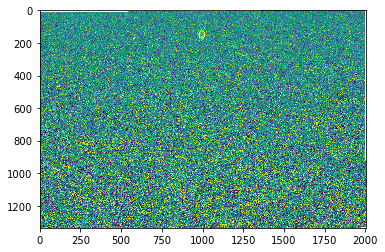

In [6]:
refimage = filenames[0]
hdu_ref = fits.open(filenames[0])[0]
sumimage = hdu_ref.data
for i in np.arange(1,len(filenames)-1):
    hdu_next = fits.open(filenames[i])[0]
    reproject_image, footprint = reproject_interp(hdu_next, hdu_ref.header)
    sumimage = sumimage + reproject_image
plt.imshow(sumimage,vmin=scoreatpercentile(sumimage,2),vmax=scoreatpercentile(sumimage,97))
fits.writeto(imagepath+'ring-combined.fits', sumimage, hdu_ref.header, overwrite=True)